# Iris Flower Classification

Iris flowers are classified into three species: setosa, versicolor and virginica. Each of which exhibits distinct characteristics in terms of measurements.

#### Problem Statement:
The iris flower, scientifically known as Iris, is a distinctive genus of flowering plants. Within this genus, there are three primary species: Iris setosa, Iris versicolor, and Iris virginica. These species exhibit variations in their physical characteristics, particularly in the measurements of their sepal length, sepal width, petal length, and petal width.


#### Objective:
The primary goal of this project is to leverage machine learning techniques to build a classification model that can accurately identify the species of iris flowers based on their measurements. The model aims to automate the classification process, offering a practical solution for identifying iris species.

### 1. Import Libraries

In [2]:
# Importing numpy and pandas for data processing and data wrangling
import numpy as np
import pandas as pd

# Import tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Import libraries used for data preprocessing
from sklearn.preprocessing import LabelEncoder

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold

# Library used for ML Model Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Library for ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load Dataset

In [3]:
df = pd.read_csv("C:/Data Science/CodSoft_Internship/Iris_Flower_Classification/IRIS.csv")

In [4]:
# Displaying top 5 rows of the dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Dimensions of dataset
df.shape

(150, 5)

There are 150 rows and 5 columns

In [6]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Dataset Duplicate values count
dup = df.duplicated().sum()
dup

3

## Data Visualization

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

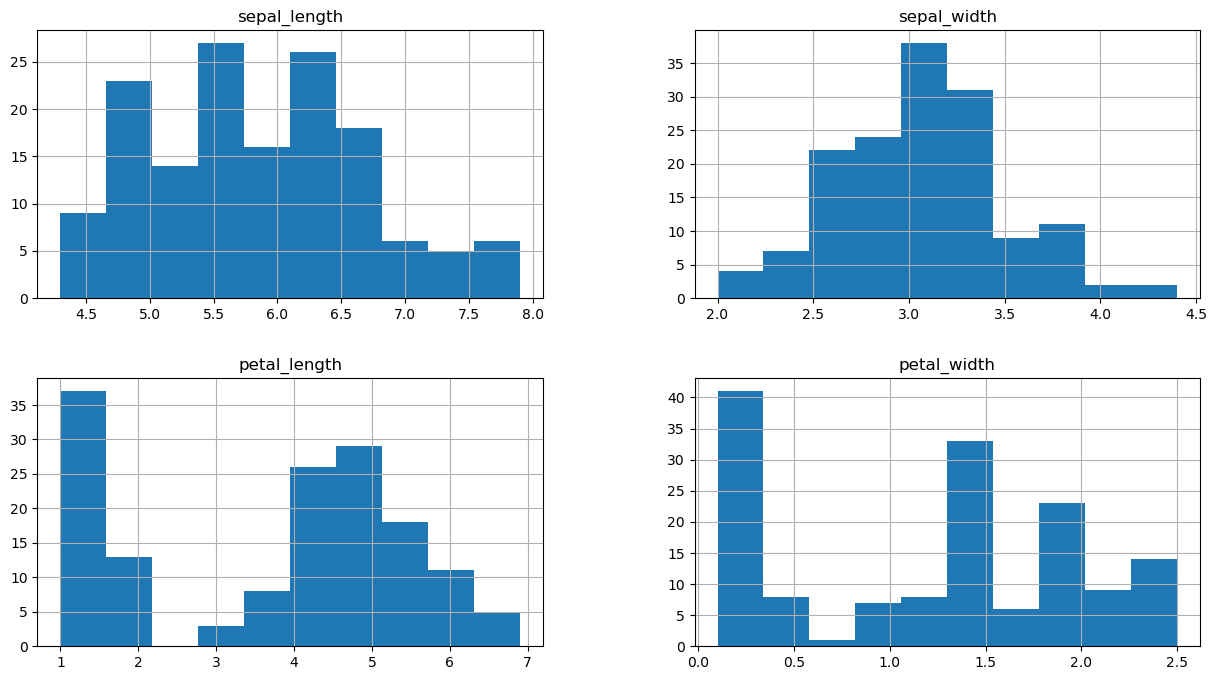

In [9]:
df.hist(figsize=(15,8))

<Axes: title={'center': 'Species vs Sepal length'}, xlabel='species', ylabel='sepal_length'>

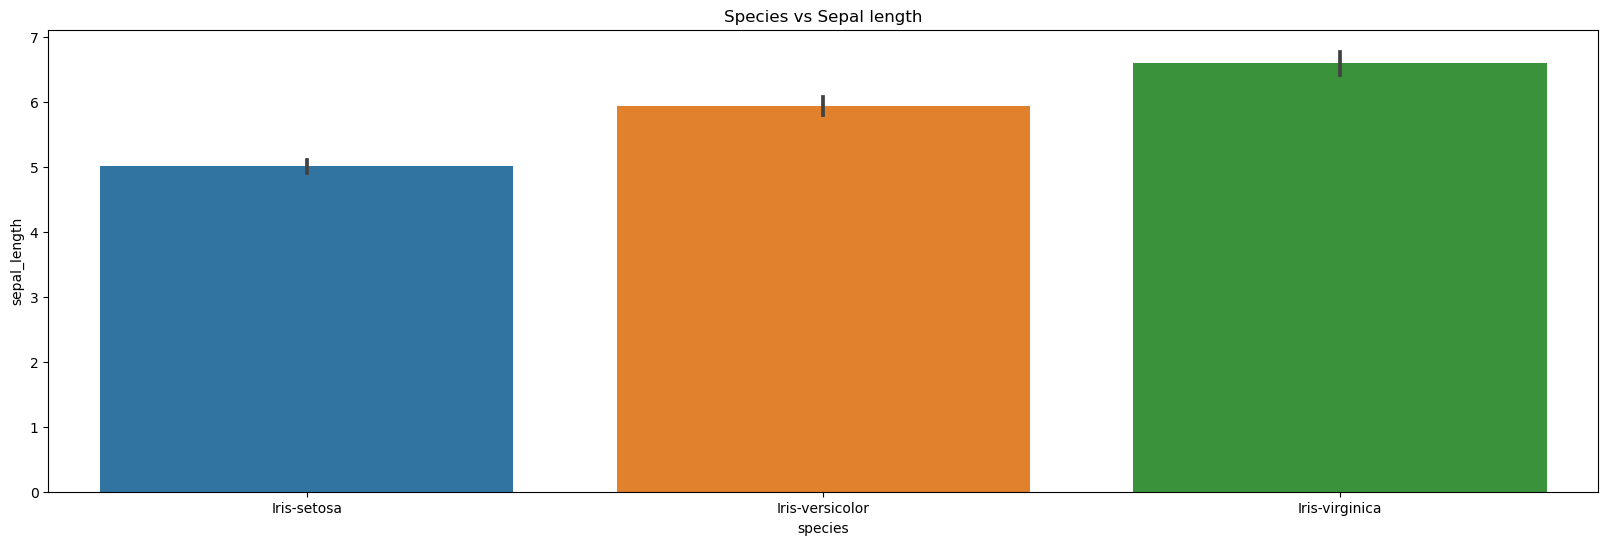

In [11]:
plt.figure(figsize=(20,6))
plt.title("Species vs Sepal length")
sns.barplot(data = df, x='species', y='sepal_length')

<Axes: title={'center': 'Species Vs Sepal width'}, xlabel='species', ylabel='sepal_width'>

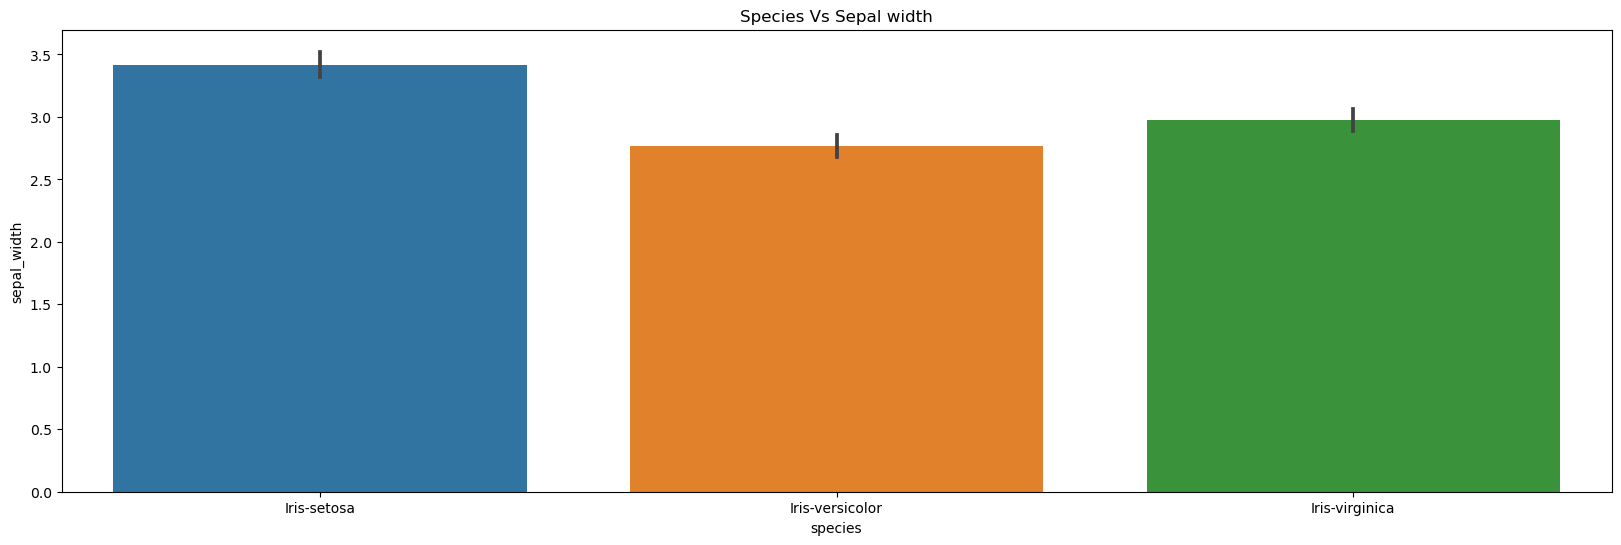

In [12]:
plt.figure(figsize=(20,6))
plt.title("Species Vs Sepal width")
sns.barplot(data=df,x='species',y='sepal_width')

<Axes: title={'center': 'Species Vs petal length'}, xlabel='species', ylabel='petal_length'>

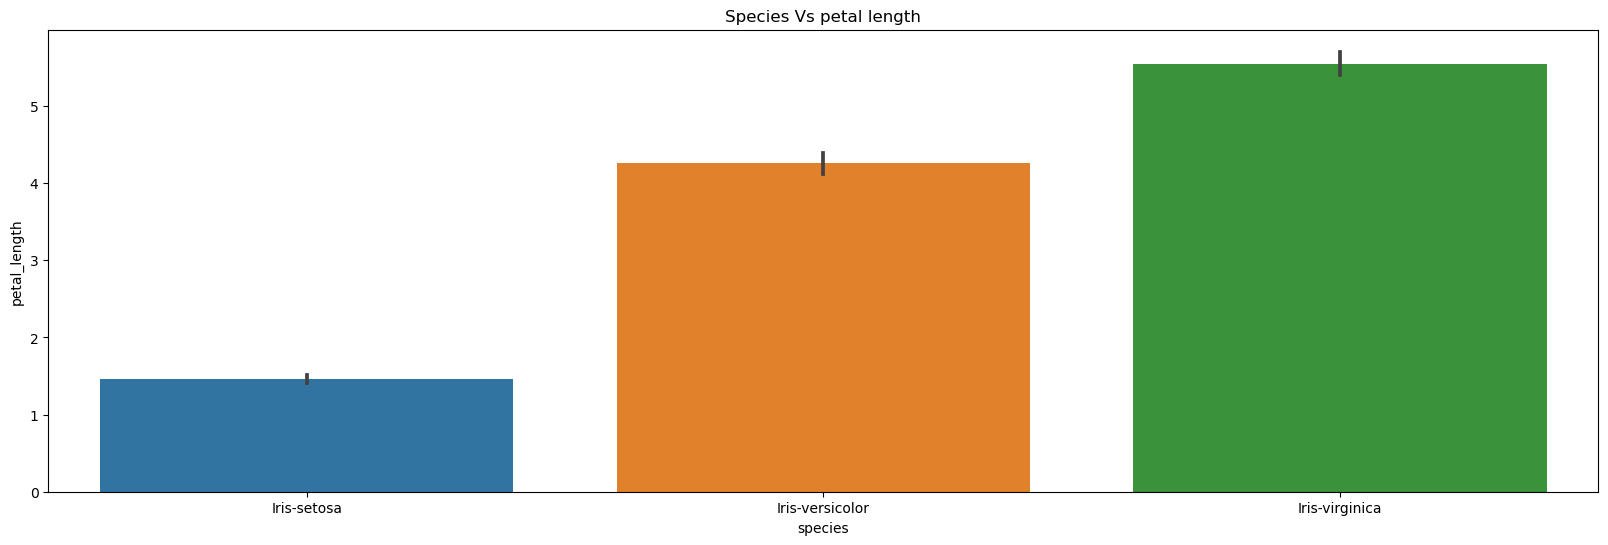

In [13]:
plt.figure(figsize=(20,6))
plt.title("Species Vs petal length")
sns.barplot(data=df,x='species',y='petal_length')

<Axes: title={'center': 'Species Vs petal width'}, xlabel='species', ylabel='petal_width'>

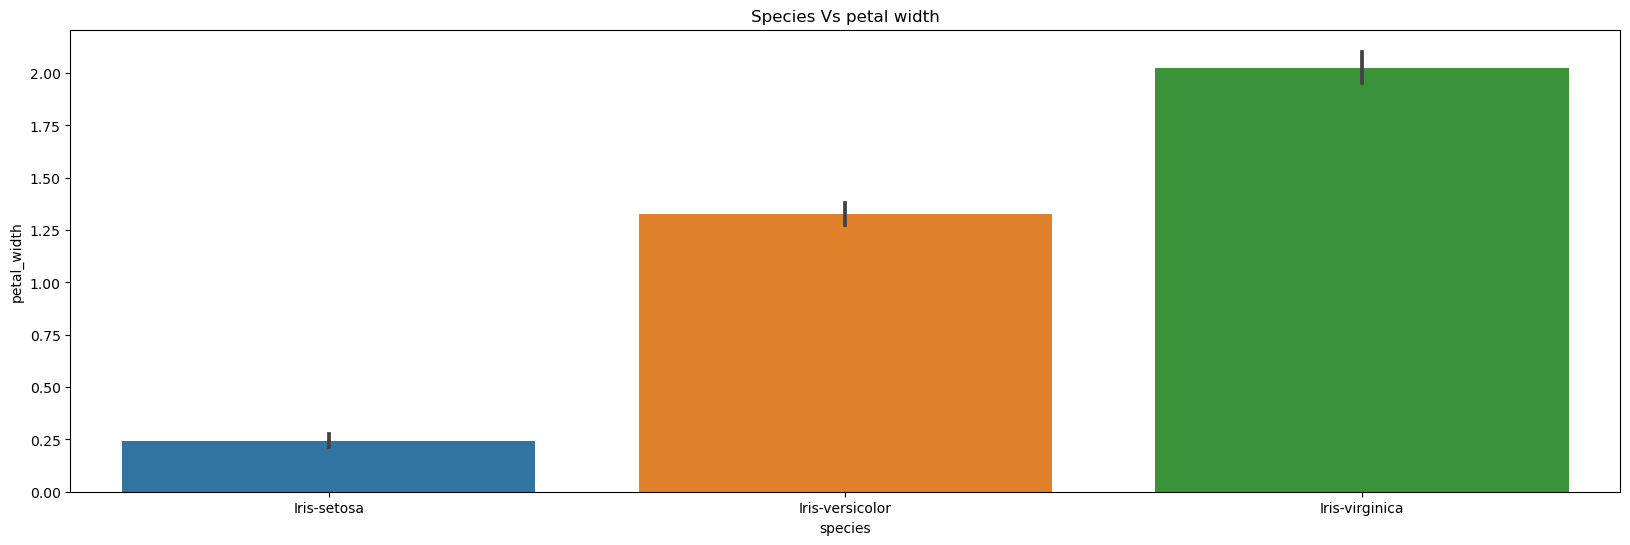

In [14]:
plt.figure(figsize=(20,6))
plt.title("Species Vs petal width")
sns.barplot(data=df,x='species',y='petal_width')

## Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


We can see here that species columns data is like 0, 1 and 2.

<Axes: >

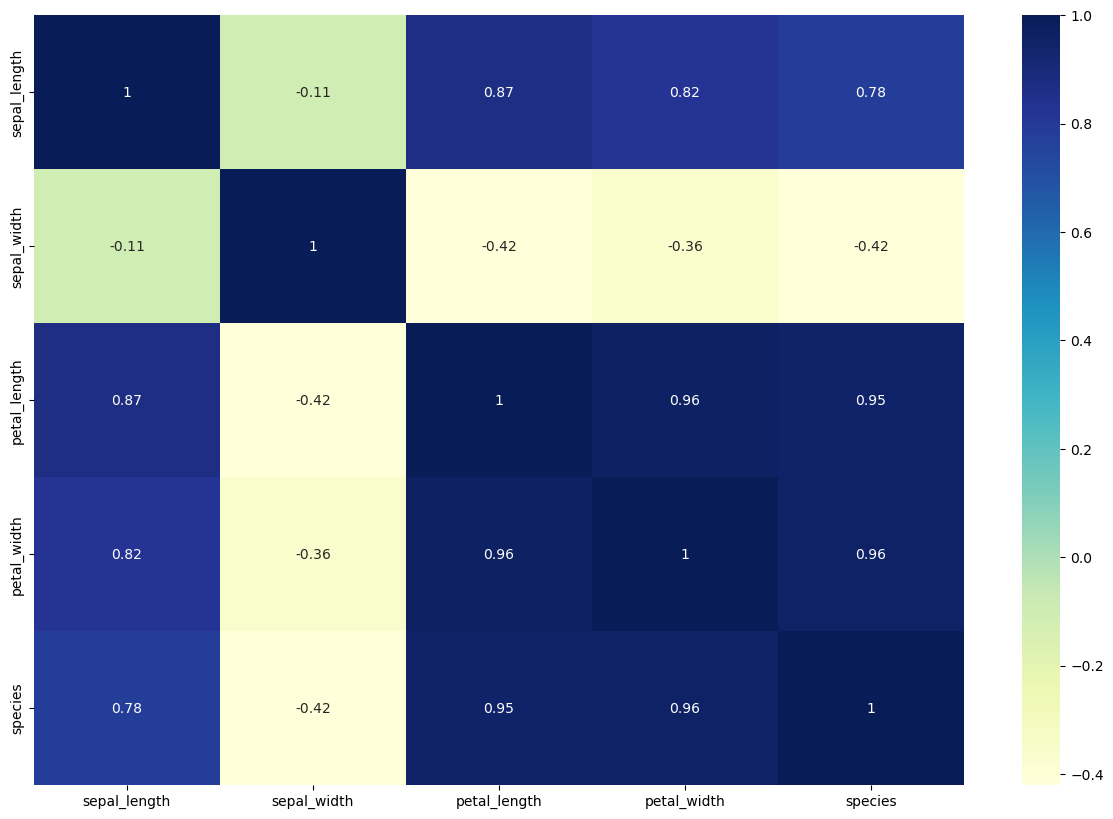

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

## Machine Learning

### Setting features

In [19]:
x = df.drop(['species'],axis=1)
y = df['species']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

## Modeling

### Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(x_train,y_train)

DecisionTreeClassifier()

## Evaluation

In [22]:
pred = dtr.predict(x_test)
accuracy_score(pred, y_test)

0.9